# 对 问题1 的解决方案

问题 1 蔬菜类商品不同品类或不同单品之间可能存在一定的关联关系，请分析 **蔬菜各品类及单品销售量** 的 **分布规律** 及 **相互关系** 。

首先，读取相关文件

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 设置字体为微软雅黑
plt.rcParams['font.family'] = 'sans-serif'  # 设置字体族为 sans-serif
# 设置图表色盘
sns.set_palette("pastel")

In [2]:
original_df1 = pd.read_csv("附件1.csv")
original_df1

,单品编码,单品名称,分类编码,分类名称
0,102900005115168,牛首生菜,1011010101,花叶类
1,102900005115199,四川红香椿,1011010101,花叶类
2,102900005115625,本地小毛白菜,1011010101,花叶类
3,102900005115748,白菜苔,1011010101,花叶类
4,102900005115762,苋菜,1011010101,花叶类
...,...,...,...,...
246,106958851400125,海鲜菇(袋)(4),1011010801,食用菌
247,106971533450003,海鲜菇(包),1011010801,食用菌
248,106971533455008,海鲜菇(袋)(3),1011010801,食用菌
249,106973223300667,虫草花(盒)(2),1011010801,食用菌


### 先检查数据干净度

In [3]:
original_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   单品编码    251 non-null    int64 
 1   单品名称    251 non-null    object
 2   分类编码    251 non-null    int64 
 3   分类名称    251 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.0+ KB


一共251条数据，数据的每个属性**都没有缺失值**，其中，`分类名称`为分类变量，可以进行类型转换转成`category`类型的数据

In [4]:
original_df1["分类名称"] = original_df1["分类名称"].astype("category")
original_df1["分类名称"]

0      花叶类
1      花叶类
2      花叶类
3      花叶类
4      花叶类
      ... 
246    食用菌
247    食用菌
248    食用菌
249    食用菌
250    食用菌
Name: 分类名称, Length: 251, dtype: category
Categories (6, object): ['水生根茎类', '花叶类', '花菜类', '茄类', '辣椒类', '食用菌']

可以看出，蔬菜品类一共6种

现在看一看是否有**重复的单品编码与分类编码**，如果有重复，则保留第一次出现值。

In [5]:
original_df1.drop_duplicates(subset = ["单品编码", "分类编码"], inplace = True)
original_df1

,单品编码,单品名称,分类编码,分类名称
0,102900005115168,牛首生菜,1011010101,花叶类
1,102900005115199,四川红香椿,1011010101,花叶类
2,102900005115625,本地小毛白菜,1011010101,花叶类
3,102900005115748,白菜苔,1011010101,花叶类
4,102900005115762,苋菜,1011010101,花叶类
...,...,...,...,...
246,106958851400125,海鲜菇(袋)(4),1011010801,食用菌
247,106971533450003,海鲜菇(包),1011010801,食用菌
248,106971533455008,海鲜菇(袋)(3),1011010801,食用菌
249,106973223300667,虫草花(盒)(2),1011010801,食用菌


清洗数据完毕，现在查看各个分类下蔬菜的占比

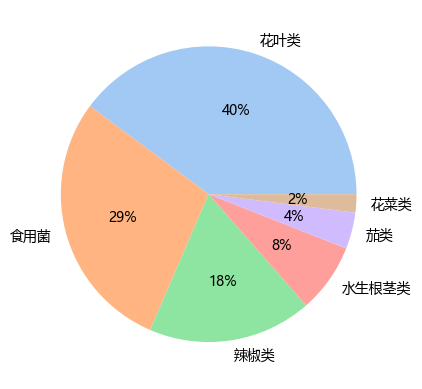

In [6]:
category_count = original_df1["分类名称"].value_counts()
plt.pie(category_count, autopct='%0.f%%', labels=category_count.index)
plt.show()

能够看到，花叶类蔬菜与食用菌的单品最丰富，辣椒类其次，其他类别单品数量远少于三者

In [7]:
original_df2 = pd.read_csv("附件2.csv")
original_df2

,销售日期,扫码销售时间,单品编码,销量(千克),销售单价(元/千克),销售类型,是否打折销售
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,销售,否
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,销售,否
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,销售,否
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,销售,否
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,销售,否
...,...,...,...,...,...,...,...
878498,2023-06-30,21:35:13.264,102900005115250,0.284,24.0,销售,否
878499,2023-06-30,21:35:14.358,102900011022764,0.669,12.0,销售,否
878500,2023-06-30,21:35:20.264,102900005115250,0.125,24.0,销售,否
878501,2023-06-30,21:35:21.509,102900011016701,0.252,5.2,销售,否


现在对表2进行整理

In [8]:
original_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878503 entries, 0 to 878502
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   销售日期        878503 non-null  object 
 1   扫码销售时间      878503 non-null  object 
 2   单品编码        878503 non-null  int64  
 3   销量(千克)      878503 non-null  float64
 4   销售单价(元/千克)  878503 non-null  float64
 5   销售类型        878503 non-null  object 
 6   是否打折销售      878503 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 46.9+ MB


共 878503 条数据，无缺失值，其中`销售日期`、`扫码销售时间`应为时间类型，故进行类型转换，变为时间序列。

同时，对于后续分析，在表中添加每天的`销售额`属性。

In [9]:
original_df2["销售日期"] = pd.to_datetime(original_df2['销售日期'])
original_df2["扫码销售时间"] = pd.to_datetime(original_df2['销售日期'].astype(str) + ' '
                                        + original_df2['扫码销售时间'].astype(str) ,
                                        errors = 'coerce', 
                                        format = '%Y-%m-%d %H:%M:%S.%f')
original_df2["销售金额(元)"] = original_df2["销量(千克)"] * original_df2["销售单价(元/千克)"]

In [10]:
original_df2

,销售日期,扫码销售时间,单品编码,销量(千克),销售单价(元/千克),销售类型,是否打折销售,销售金额(元)
0,2020-07-01,2020-07-01 09:15:07.924,102900005117056,0.396,7.6,销售,否,3.0096
1,2020-07-01,2020-07-01 09:17:27.295,102900005115960,0.849,3.2,销售,否,2.7168
2,2020-07-01,2020-07-01 09:17:33.905,102900005117056,0.409,7.6,销售,否,3.1084
3,2020-07-01,2020-07-01 09:19:45.450,102900005115823,0.421,10.0,销售,否,4.2100
4,2020-07-01,2020-07-01 09:20:23.686,102900005115908,0.539,8.0,销售,否,4.3120
...,...,...,...,...,...,...,...,...
878498,2023-06-30,2023-06-30 21:35:13.264,102900005115250,0.284,24.0,销售,否,6.8160
878499,2023-06-30,2023-06-30 21:35:14.358,102900011022764,0.669,12.0,销售,否,8.0280
878500,2023-06-30,2023-06-30 21:35:20.264,102900005115250,0.125,24.0,销售,否,3.0000
878501,2023-06-30,2023-06-30 21:35:21.509,102900011016701,0.252,5.2,销售,否,1.3104


In [11]:
original_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878503 entries, 0 to 878502
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   销售日期        878503 non-null  datetime64[ns]
 1   扫码销售时间      878371 non-null  datetime64[ns]
 2   单品编码        878503 non-null  int64         
 3   销量(千克)      878503 non-null  float64       
 4   销售单价(元/千克)  878503 non-null  float64       
 5   销售类型        878503 non-null  object        
 6   是否打折销售      878503 non-null  object        
 7   销售金额(元)     878503 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 53.6+ MB


再回顾分析目标：**蔬菜各品类及单品销售量** 的 **分布规律** 及 **相互关系** 。

由附件数据，
分布规律可以是随时间的分布规律，也可以是随品类的分布规律，还可以是随订单的分布规律。
相互关系可以是品类之间的相互关系或单品间的相互关系。
找寻我们需要分析的数据。

先考虑对分析帮助不大的数据：1.没有销量的单品数据  2.销售天数少的单品  3.销量低的单品

分品类，调用`DataFrame.to_dict()`方法，将单品编码与分类名称连接形成字典，便于后续操作

In [13]:
mapping_dict = original_df1.set_index('单品编码')['分类名称'].to_dict()
original_df2['品类'] = original_df2['单品编码'].map(mapping_dict)
original_df2.head(10)

,销售日期,扫码销售时间,单品编码,销量(千克),销售单价(元/千克),销售类型,是否打折销售,销售金额(元),品类
0,2020-07-01,2020-07-01 09:15:07.924,102900005117056,0.396,7.6,销售,否,3.0096,辣椒类
1,2020-07-01,2020-07-01 09:17:27.295,102900005115960,0.849,3.2,销售,否,2.7168,花叶类
2,2020-07-01,2020-07-01 09:17:33.905,102900005117056,0.409,7.6,销售,否,3.1084,辣椒类
3,2020-07-01,2020-07-01 09:19:45.450,102900005115823,0.421,10.0,销售,否,4.2100,花叶类
4,2020-07-01,2020-07-01 09:20:23.686,102900005115908,0.539,8.0,销售,否,4.3120,花叶类
5,2020-07-01,2020-07-01 09:21:55.556,102900005117056,0.277,7.6,销售,否,2.1052,辣椒类
6,2020-07-01,2020-07-01 09:21:56.536,102900005115779,0.338,8.0,销售,否,2.7040,花叶类
7,2020-07-01,2020-07-01 09:22:01.274,102900005117056,0.132,7.6,销售,否,1.0032,辣椒类
8,2020-07-01,2020-07-01 09:22:01.476,102900005115779,0.213,8.0,销售,否,1.7040,花叶类
9,2020-07-01,2020-07-01 09:22:15.998,102900011008522,0.514,8.0,销售,否,4.1120,花叶类


现在，附件2的信息已经完整了，下一步筛去不需要的数据

In [14]:
# step1 处理无销量数据 unique方法获得某一列的唯一值，返回一个包含这些值的数组
item_code1 = original_df1['单品编码'].unique()
item_code2 = original_df2['单品编码'].unique()
no_sales_code = set(item_code1) - set(item_code2)
count_no_sales_code = len(no_sales_code)
print("无销量的数据有：", no_sales_code)
print("个数为：", count_no_sales_code)

无销量的数据有： {102900011023648, 102900011011782, 102900005116776, 102900005116042, 102900011032145}
个数为： 5


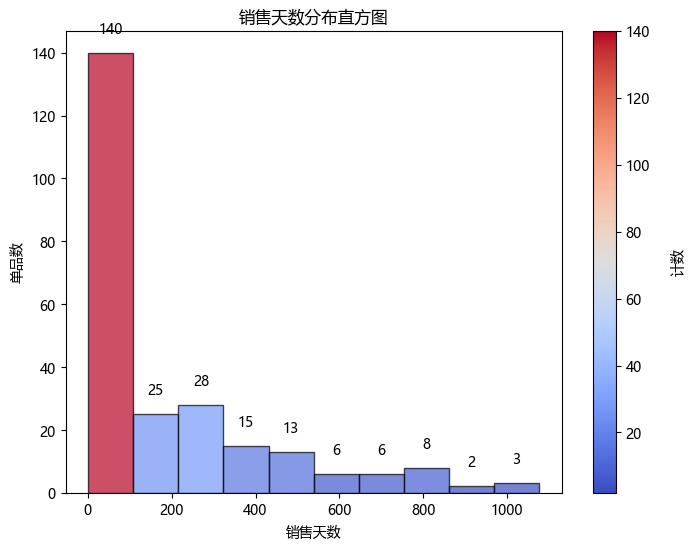

In [20]:
# step2 处理销售天数少于10天的数据
from matplotlib.cm import ScalarMappable
# ScalarMappable 类是 Matplotlib 中的一个类，用于创建一个标量映射对象。
# 标量映射对象通常用于创建颜色映射，将数值映射到颜色空间中的颜色。
# 这在绘制一些需要根据数据值来展示颜色的图形时非常有用，比如热度图、散点图等。
# 观察单品销售天数情况
result_by_days = original_df2.groupby('单品编码')['销售日期'].nunique().reset_index()
result_by_days.rename(columns={'销售日期': '销售天数'}, inplace=True)

hist, bins = np.histogram(result_by_days['销售天数'], bins=10)

bin_centers = 0.5 * (bins[:-1] + bins[1:])
cmap = plt.cm.coolwarm # 设置颜色映射
norm = plt.Normalize(vmin=min(hist), vmax=max(hist))
colors = cmap(norm(hist))
plt.figure(figsize=(8,6))
bars = plt.bar(bin_centers, hist, width=bins[1]-bins[0], color=colors, edgecolor='k', alpha=0.7)

for i, count in enumerate(hist):
    plt.text(bin_centers[i], count + 5, str(count), ha='center', va='bottom')
    
plt.xlabel('销售天数')
plt.ylabel('单品数')
plt.title('销售天数分布直方图')

sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical')
cbar.set_label('计数', rotation=90, labelpad=15)
plt.show()

可以看出，在三年内，有140中单品销售天数在100天及以下，大概只有三种单品是每天都销售的

In [22]:
# 现在查看销售天数小于阈值的数据
threshold_1 = 10
filtered_result = result_by_days[result_by_days['销售天数'] <= threshold_1]
count = filtered_result.shape[0]
list_1 = []
for index, row in filtered_result.iterrows():
    if row['销售天数'] <= threshold_1:
        list_1.append(row['单品编码'])
print(f'\n阈值为{threshold_1}时被移除的单品数量：{count}')
print('分别为：')
print(list_1)


阈值为10时被移除的单品数量：60
分别为：
[102900005115816, 102900005116905, 102900005117353, 102900005128748, 102900011000175, 102900011000335, 102900011008492, 102900011008577, 102900011009772, 102900011010563, 102900011011058, 102900011015391, 102900011021675, 102900011021699, 102900011022924, 102900011023075, 102900011023976, 102900011024010, 102900011026502, 102900011026618, 102900011026793, 102900011027462, 102900011027615, 102900011029275, 102900011029299, 102900011029688, 102900011030400, 102900011030417, 102900011030561, 102900011030615, 102900011030622, 102900011030639, 102900011031735, 102900011031742, 102900011031759, 102900011031841, 102900011031858, 102900011032114, 102900011032282, 102900011033531, 102900011033562, 102900011033586, 102900011033913, 102900011033968, 102900011033999, 102900011034316, 102900011034323, 102900011034354, 102900011034538, 102900011034705, 102900011035849, 102900011035962, 102900011036068, 102900011036266, 102900051000890, 102900051006229, 106931885000035, 106931

In [27]:
# step3 处理销量低的单品
threshold_2 = 0.00003 
grouped = original_df2.groupby('单品编码')['销量(千克)'].sum().reset_index()
print("现在还有单品数：",len(grouped))
total_sales = grouped['销量(千克)'].sum()
grouped['销量占比'] = grouped['销量(千克)'] / total_sales
low_percentage_groups = grouped[grouped['销量占比'] < threshold_2]['单品编码']

list_2 = low_percentage_groups.to_list()
print("总销量为：", total_sales)
print("销量占比低于{threshold_2}的组的单品为：")
print(list_2)
print("合计：", len(low_percentage_groups))

现在还有单品数： 246
总销量为： 470975.91799999995
销量占比低于{threshold_2}的组的单品为：
[102900005116905, 102900005128748, 102900011000335, 102900011000632, 102900011007471, 102900011007495, 102900011008492, 102900011008515, 102900011008577, 102900011009772, 102900011010563, 102900011011058, 102900011012871, 102900011015384, 102900011015391, 102900011021675, 102900011021699, 102900011023075, 102900011026502, 102900011026618, 102900011026793, 102900011027615, 102900011029275, 102900011029299, 102900011029688, 102900011030400, 102900011030417, 102900011030561, 102900011030615, 102900011030622, 102900011030639, 102900011031742, 102900011031759, 102900011031841, 102900011031858, 102900011032114, 102900011032480, 102900011033173, 102900011033531, 102900011033562, 102900011033586, 102900011033913, 102900011033968, 102900011033999, 102900011034316, 102900011034323, 102900011034538, 102900011034705, 102900011035962, 102900011036068, 102900011036266, 102900051000890, 106931885000035, 106931885000356, 106971563780002,

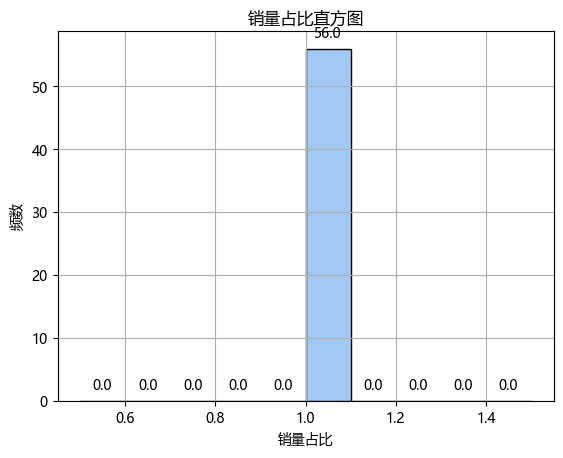

In [28]:
# 对销量可视化
data_g = []
for  i in grouped['销量占比']:
    if i <= threshold_2:
        data_g.append(1)
        
bins = 10
n, bins, patches = plt.hist(data_g, bins=bins, edgecolor='k')
plt.xlabel('销量占比')
plt.ylabel('频数')
plt.title('销量占比直方图')
plt.grid()
for i, rect in enumerate(patches):
    height = rect.get_height()
    plt.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height), 
                 xytext=(0,5), textcoords='offset points', ha='center', va='bottom')
    
plt.show()

In [30]:
# 查看哪些单品不符合
intersection = list(set(list_1) & set(list_2))
target_item = intersection[1]
grouped = original_df2.groupby(['单品编码', '销售日期'])['销量(千克)'].sum().reset_index()
filtered_df = grouped[grouped['单品编码'] == target_item]
print(filtered_df)


                  单品编码       销售日期  销量(千克)
27622  102900011010563 2020-09-24   0.475
27623  102900011010563 2020-09-25   0.156
27624  102900011010563 2020-09-26   0.584
